# Chapter 2. 기술통계를 활용한 데이터 시각화 기초

## 1. 데이터 시각화 라이브러리 matplotlib 소개

### 1-1. 시각화 라이브러리

In [29]:
# 수치 계산에 사용되는 라이브러리
import numpy as np
import pandas as pd

# 표시 자릿수 지정
%precision 3

# 그래프를 그리는 라이브러리
from matplotlib import pyplot as plt

# 그래프가 jupyter Notebook에 표시되도록 지정
%matplotlib inline

# 랜덤하게 숫자를 샘플링
import random

### 1-2. 꺾은선 그래프

In [30]:
x = list(range(0, 10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [31]:
y = random.sample(range(0, 10), 10)
y

[0, 8, 6, 4, 2, 3, 9, 7, 5, 1]

Text(0, 0.5, 'y')

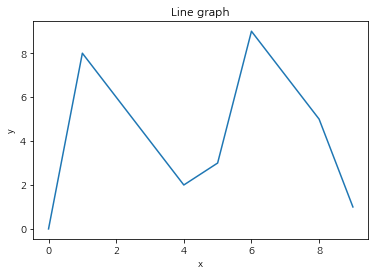

In [32]:
plt.plot(x, y)
plt.title("Line graph")

plt.xlabel("x")
plt.ylabel("y")

In [33]:
#  그래프 기본 스타일 설정
plt.style.use('default')

# 그래프 크기
plt.rcParams['figure.figsize'] = (15, 4)

# 그래프 사이즈
plt.rcParams['font.size'] = 12

# 한글폰트
plt.rcParams['font.family'] ='NanumGothic'

Text(0, 0.5, 'y')

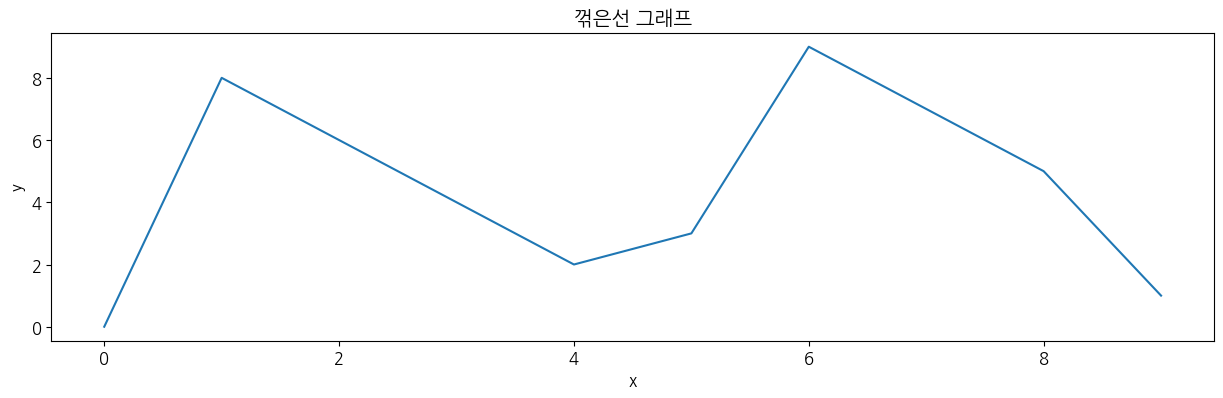

In [36]:
plt.plot(x, y)
plt.title("꺾은선 그래프")

plt.xlabel("x")
plt.ylabel("y")

### 1-3. seaborn 라이브러리 활용

In [16]:
import seaborn as sns
sns.set() #  sns.set() 환경변수 설정 함수 : set 함수는 스타일, 팔레트, 글꼴, 글꼴 크기 등 앞으로 그리게 되는 모든 플롯의 그림에 영향

Text(0, 0.5, 'y')

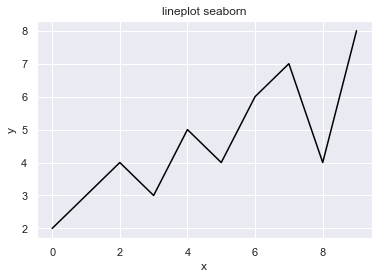

In [17]:
plt.plot(x, y, color = 'black')
plt.title("lineplot seaborn")
plt.xlabel("x")
plt.ylabel("y")

### 1-4. seaborn + pyplot에 의한 꺾은 선 그래프

In [42]:
homerun_ball_data = random.choices(range(2, 5), k=10) # 중복가능
homerun_ball_data

[3, 4, 2, 4, 3, 4, 3, 3, 2, 3]

<Axes: ylabel='Count'>

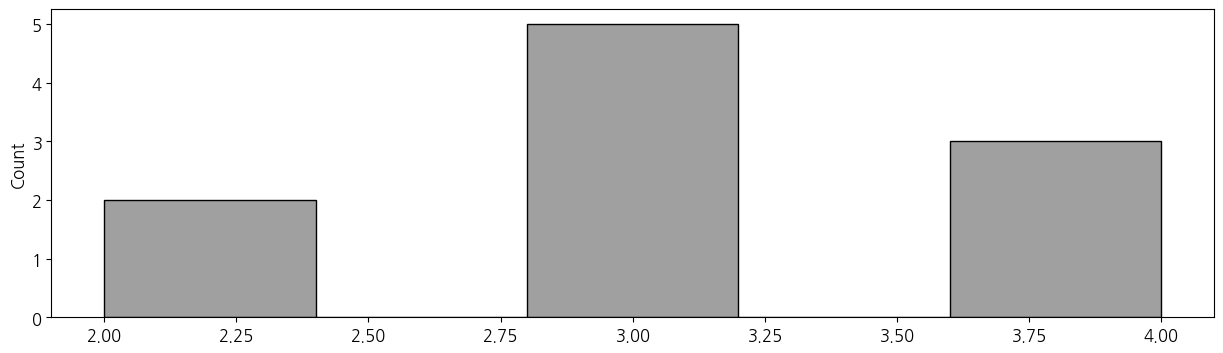

In [45]:
sns.histplot(homerun_ball_data, bins = 5, 
             color = 'gray', kde = False)

### 1-5. 커널 밀도 추정에 의한 히스토그램 평활화

<Axes: ylabel='Count'>

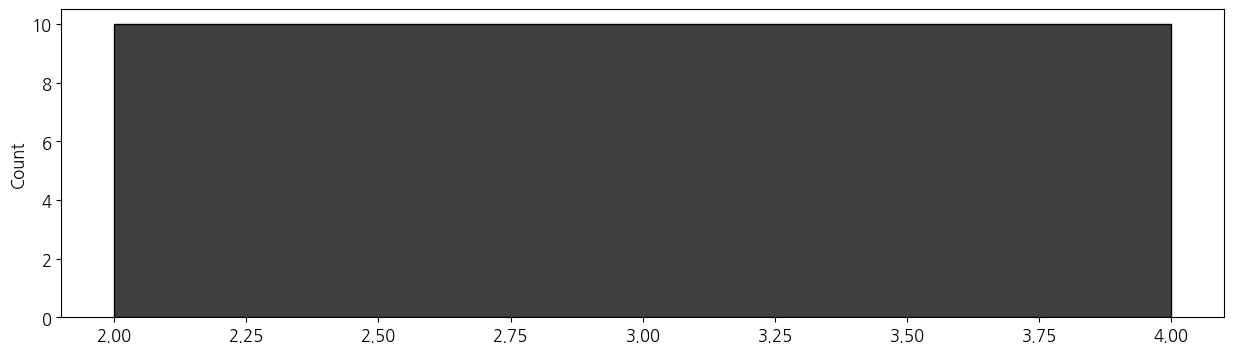

In [46]:
sns.histplot(homerun_ball_data, bins = 1, 
             color = 'black', kde = False)

<Axes: ylabel='Count'>

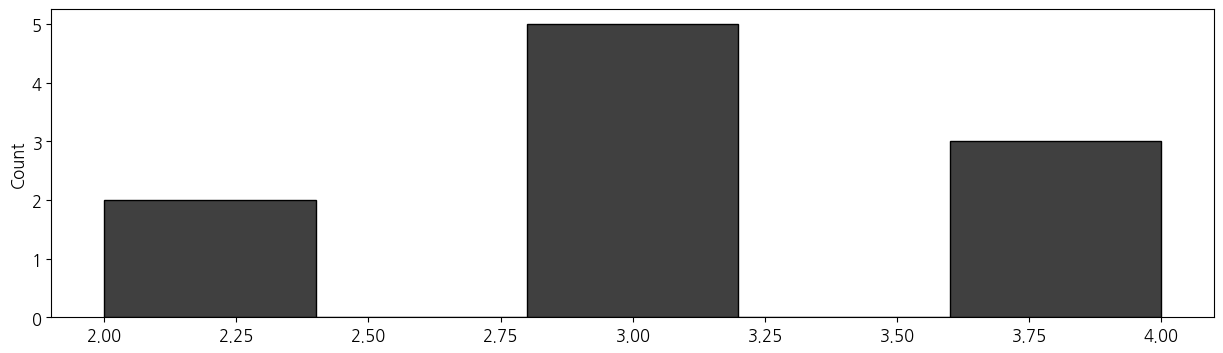

In [47]:
sns.histplot(homerun_ball_data, color = 'black')

### 1-6. 2변량 데이터에 대한 히스토그램

In [50]:
homerun_ball_two = pd.read_csv("homerun_ball_two_2.csv")
print(homerun_ball_two)

    판매처   질량
0   편의점  1.5
1   편의점  1.5
2   편의점  1.5
3   편의점  1.6
4   편의점  1.6
5   편의점  1.6
6   편의점  1.6
7   편의점  1.7
8   편의점  1.7
9   편의점  1.8
10   마트  1.5
11   마트  1.6
12   마트  1.6
13   마트  1.7
14   마트  1.7
15   마트  1.7
16   마트  1.7
17   마트  1.8
18   마트  1.8
19   마트  1.9


In [51]:
print(homerun_ball_two.groupby("판매처").describe())

       질량                                             
    count  mean       std  min    25%  50%    75%  max
판매처                                                   
마트   10.0  1.70  0.115470  1.5  1.625  1.7  1.775  1.9
편의점  10.0  1.61  0.099443  1.5  1.525  1.6  1.675  1.8


In [52]:
# 데이터를 홈런볼 판매처 종류별로 나누기
질량_a = homerun_ball_two.query('판매처 == "편의점"')["질량"]
질량_b = homerun_ball_two.query('판매처 == "마트"')["질량"]

<Axes: xlabel='질량', ylabel='Count'>

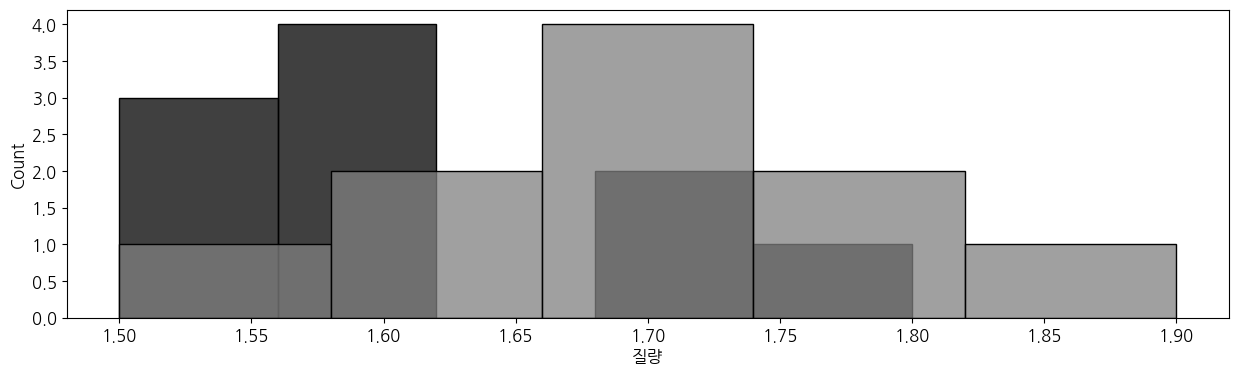

In [54]:
# 히스토그램 두 개 그리기
sns.histplot(질량_a, bins = 5, 
             color = 'black', kde = False)
sns.histplot(질량_b, bins = 5, 
             color = 'gray', kde = False)

### 1-7. 상자 수염 다이어그램

<Axes: xlabel='판매처', ylabel='질량'>

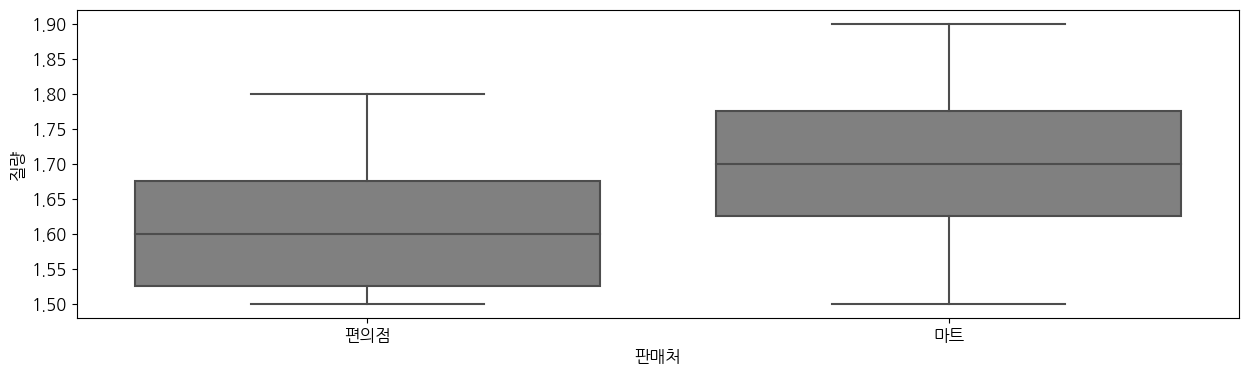

In [55]:
# 상자 수염 그림
sns.boxplot(x = "판매처", y  = "질량", 
            data = homerun_ball_two, color = 'gray')

In [56]:
homerun_ball_two.groupby("판매처").describe()

질량                                             
    count  mean       std  min    25%  50%    75%  max
판매처                                                   
마트   10.0  1.70  0.115470  1.5  1.625  1.7  1.775  1.9
편의점  10.0  1.61  0.099443  1.5  1.525  1.6  1.675  1.8

### 1-8. 바이올린 플롯

<Axes: xlabel='판매처', ylabel='질량'>

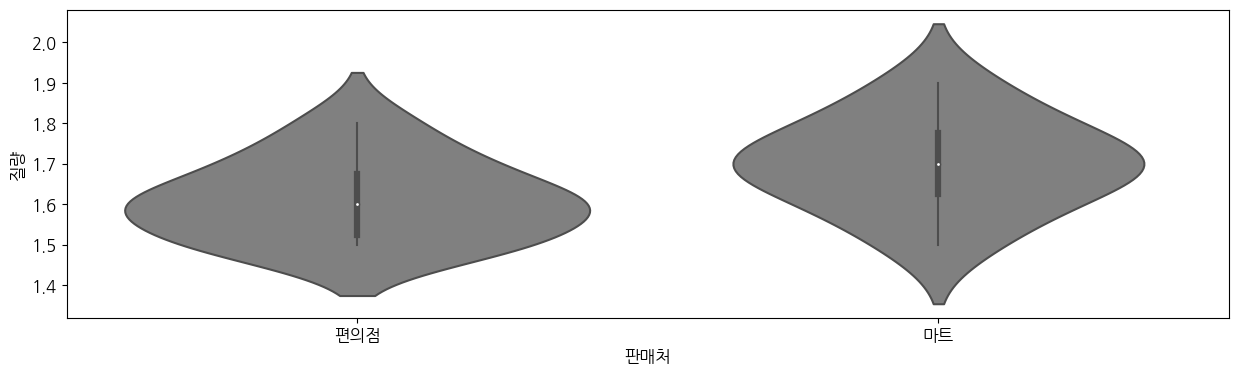

In [57]:
sns.violinplot(x = "판매처", y  = "질량", 
               data = homerun_ball_two, color = 'gray')

### 1-9. 막대 그래프

<Axes: xlabel='판매처', ylabel='질량'>

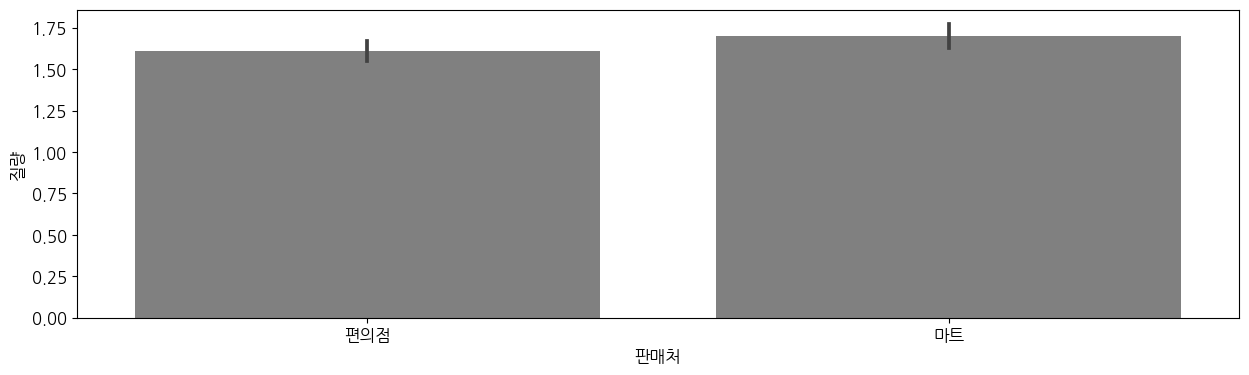

In [58]:
sns.barplot(x = "판매처", y  = "질량", 
            data = homerun_ball_two, color = 'gray')

### 1-10. 산점도

In [66]:
cov_data = pd.read_csv("homerunball_diameter_mass.csv")
print(cov_data)

    지름   질량
0  1.8  1.5
1  1.8  1.6
2  1.9  1.7
3  1.9  1.7
4  2.1  1.8
5  2.0  1.7
6  2.1  1.9
7  2.2  2.0
8  2.3  2.1
9  2.3  1.9


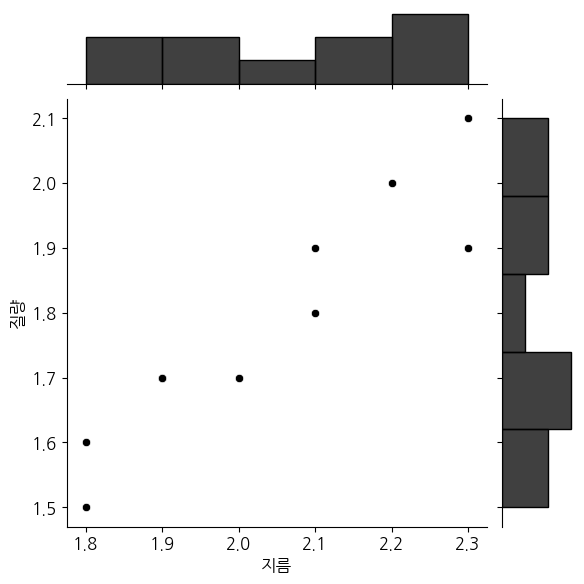

In [67]:
sns.jointplot(x = "지름", y = "질량", 
              data = cov_data, color = 'black')

### 1-11. Pair plot

In [68]:
# seaborn 임베디드 데이터 얻기
iris = sns.load_dataset("iris")
iris.head(n = 3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### 1-12. 홈런볼 데이터 마트와 편의점 데이터 생성

In [79]:
import random
import pandas as pd

# 데이터 크기 설정
data_size = 200

# 변수 범위 설정
diameter_range = (1.5, 2.5)
height_range = (1.3, 1.5)
mass_range = (1.5, 2.3)
seller_categories = ['마트', '편의점']

# 데이터 생성
data = {
    '지름': [round(random.uniform(*diameter_range), 2) for _ in range(data_size)],
    '높이': [round(random.uniform(*height_range), 2) for _ in range(data_size)],
    '질량': [round(random.uniform(*mass_range), 2) for _ in range(data_size)],
    '판매처': [random.choice(seller_categories) for _ in range(data_size)]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 인덱스 설정
df.index = range(data_size)

# CSV 파일로 저장
df.to_csv('generated_data.csv', index=False)

# 저장 확인 메시지
print("데이터가 'generated_data.csv'로 저장되었습니다.")


데이터가 'generated_data.csv'로 저장되었습니다.


In [80]:
df

,지름,높이,질량,판매처
0,2.04,1.32,2.27,편의점
1,2.21,1.42,2.12,마트
2,2.15,1.47,1.93,마트
3,2.13,1.40,2.07,편의점
4,2.32,1.34,1.94,편의점
...,...,...,...,...
195,2.25,1.48,1.92,편의점
196,2.25,1.33,1.90,편의점
197,1.50,1.42,1.85,편의점
198,2.06,1.38,1.81,편의점


In [81]:
# 종류별, 특징별 평균값
df.groupby("판매처").mean()

,지름,높이,질량
판매처,,,
마트,1.950693,1.393861,1.907030
편의점,1.998182,1.398283,1.861919


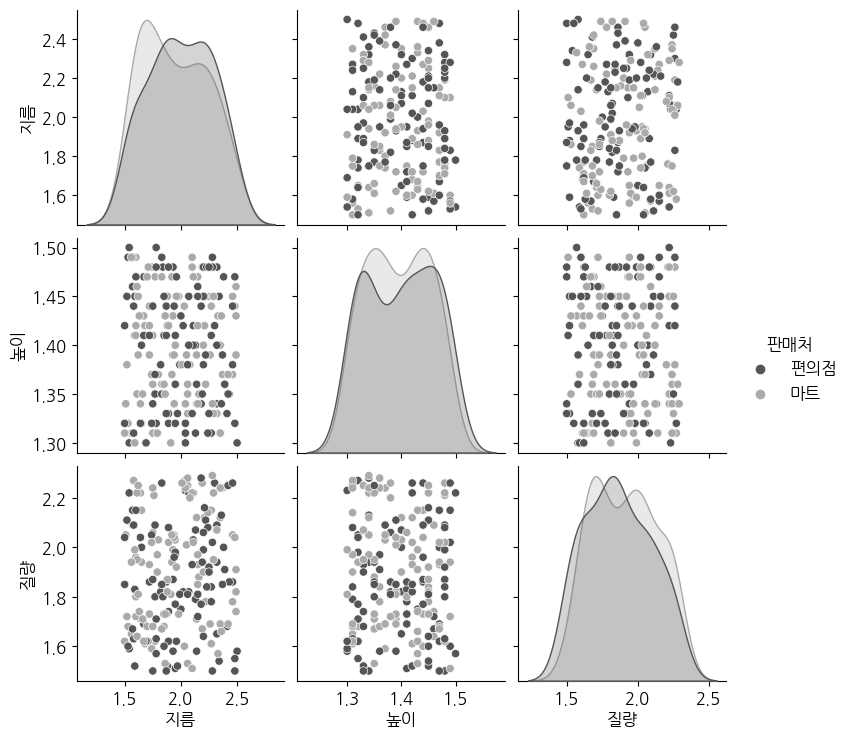

In [82]:
# 페어 플롯
sns.pairplot(df, hue="판매처", palette='gray')

### 1-13. 두 집단(편의점, 마트) 간 유의미한 차이가 있는 데이터를 생성해서 살펴보겠습니다.

### 신뢰구간 99%에서 p-value가 0.05 이하 

In [89]:
import numpy as np
import pandas as pd
from scipy.stats import t

# 데이터 크기 설정
data_size = 200

# 신뢰수준 0.95에서의 t-분포 값 계산
t_value = t.ppf(0.999, data_size * 2 - 2)

# 변수 범위 설정
diameter_range = (1.5, 2.5)
height_range = (1.3, 1.5)
mass_range = (1.5, 2.3)

# 각 판매처에 대한 데이터 생성
mart_data = {
    '지름': np.random.normal(loc=2.0, scale=0.2, size=data_size),
    '높이': np.random.normal(loc=1.4, scale=0.1, size=data_size),
    '질량': np.random.normal(loc=2.0, scale=0.2, size=data_size),
    '판매처': ['마트'] * data_size
}

convenience_store_data = {
    '지름': np.random.normal(loc=2.1, scale=0.2, size=data_size),
    '높이': np.random.normal(loc=1.45, scale=0.1, size=data_size),
    '질량': np.random.normal(loc=1.9, scale=0.2, size=data_size),
    '판매처': ['편의점'] * data_size
}

# 데이터프레임 생성
mart_df = pd.DataFrame(mart_data)
convenience_store_df = pd.DataFrame(convenience_store_data)

# 두 데이터프레임을 합쳐서 하나의 데이터프레임으로 만듦
df = pd.concat([mart_df, convenience_store_df], ignore_index=True)

# 데이터를 섞어서 인덱스를 랜덤하게 정렬
df = df.sample(frac=1).reset_index(drop=True)

# CSV 파일로 저장
df.to_csv('generated_data_with_significant_difference_at_95_confidence.csv', index=False)

# 저장 확인 메시지
print("데이터가 'generated_data_with_significant_difference_at_95_confidence.csv'로 저장되었습니다.")


데이터가 'generated_data_with_significant_difference_at_95_confidence.csv'로 저장되었습니다.


In [87]:
# 종류별, 특징별 평균값
df.groupby("판매처").mean()

,지름,높이,질량
판매처,,,
마트,1.997881,1.399290,2.014647
편의점,2.124416,1.448788,1.892332


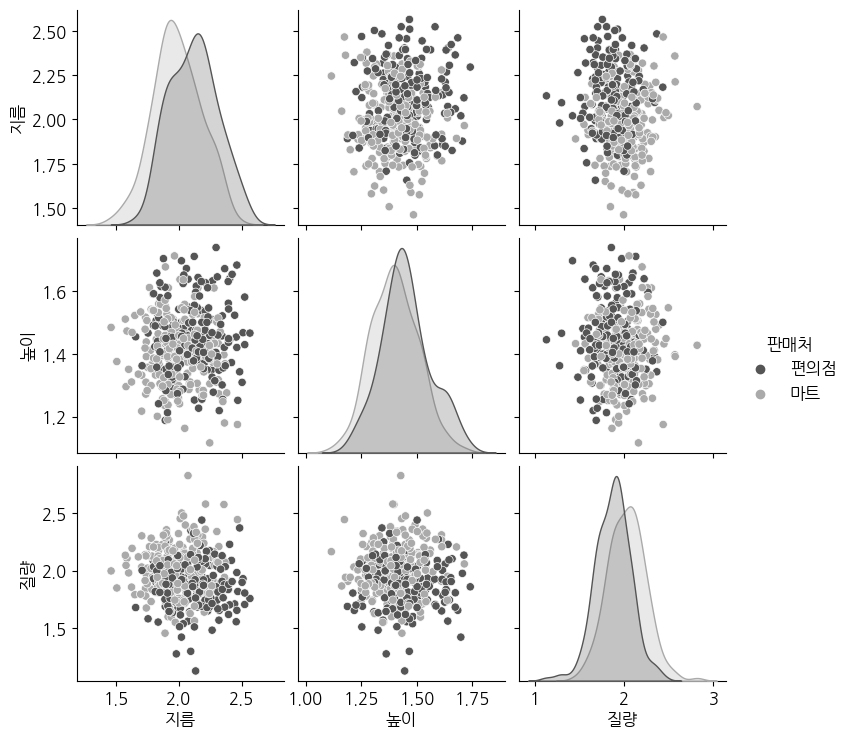

In [90]:
# 페어 플롯
sns.pairplot(df, hue="판매처", palette='gray')